# Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r'/Users/lixi/Downloads/NVSS_Provisional_COVID-19_Deaths_by_Place_of_Death_and_Age.csv',header=0)
#import data

In [6]:
df.head()

,Data as of,Start week,End Week,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,2/17/2021,1/4/2020,2/13/2021,0,United States,All places of death,All ages,458803.0,3678779.0,401866.0,219123.0,9034.0,649391.0,NaN
1,2/17/2021,1/4/2020,2/13/2021,0,United States,Decedent's home,0-14 years,7.0,3853.0,73.0,0.0,20.0,100.0,NaN
2,2/17/2021,1/4/2020,2/13/2021,0,United States,Decedent's home,15-44 years,1483.0,72899.0,1030.0,275.0,141.0,2339.0,NaN
3,2/17/2021,1/4/2020,2/13/2021,0,United States,Decedent's home,45-64 years,6495.0,248493.0,4191.0,1129.0,582.0,9852.0,NaN
4,2/17/2021,1/4/2020,2/13/2021,0,United States,Decedent's home,65-74 years,5629.0,257701.0,4706.0,1263.0,373.0,9243.0,NaN


# Clean Data

In [7]:
df=df.drop(['Data as of','Start week','End Week','Footnote'],axis=1)
#drop useless data

In [8]:
df.head()

,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,0,United States,All places of death,All ages,458803.0,3678779.0,401866.0,219123.0,9034.0,649391.0
1,0,United States,Decedent's home,0-14 years,7.0,3853.0,73.0,0.0,20.0,100.0
2,0,United States,Decedent's home,15-44 years,1483.0,72899.0,1030.0,275.0,141.0,2339.0
3,0,United States,Decedent's home,45-64 years,6495.0,248493.0,4191.0,1129.0,582.0,9852.0
4,0,United States,Decedent's home,65-74 years,5629.0,257701.0,4706.0,1263.0,373.0,9243.0


In [9]:
df.shape

(3088, 10)

In [10]:
df.isnull().sum()
#check if there is null

HHS Region                                     0
State                                          0
Place of Death                                 0
Age group                                      0
COVID-19 Deaths                              595
Total Deaths                                 327
Pneumonia Deaths                             640
Pneumonia and COVID-19 Deaths                679
Influenza Deaths                            1002
Pneumonia, Influenza, or COVID-19 Deaths     587
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 10 columns):
HHS Region                                  3088 non-null int64
State                                       3088 non-null object
Place of Death                              3088 non-null object
Age group                                   3088 non-null object
COVID-19 Deaths                             2493 non-null float64
Total Deaths                                2761 non-null float64
Pneumonia Deaths                            2448 non-null float64
Pneumonia and COVID-19 Deaths               2409 non-null float64
Influenza Deaths                            2086 non-null float64
Pneumonia, Influenza, or COVID-19 Deaths    2501 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 241.4+ KB


# Analyze and Visualize 

## In USA, which place has the largest death number due to Covid-19.

In [12]:
df_us_placeofdeath=df[(df.State=='United States')&(df['Age group']=='All ages')&(df['Place of Death']!='All places of death')]

In [13]:
df_us_placeofdeath.head()

,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
7,0,United States,Decedent's home,All ages,29636.0,1219418.0,26589.0,7509.0,1718.0,49583.0
14,0,United States,"Healthcare setting, dead on arrival",All ages,399.0,10301.0,263.0,106.0,17.0,573.0
21,0,United States,"Healthcare setting, inpatient",All ages,294378.0,1128047.0,295492.0,175945.0,5707.0,419369.0
28,0,United States,"Healthcare setting, outpatient or emergency room",All ages,15004.0,218621.0,12091.0,4942.0,387.0,22526.0
35,0,United States,Hospice facility,All ages,13374.0,220881.0,17741.0,6572.0,413.0,24942.0


In [14]:
df_us_placeofdeath.sort_values(by=['COVID-19 Deaths'],ascending=False)

,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
21,0,United States,"Healthcare setting, inpatient",All ages,294378.0,1128047.0,295492.0,175945.0,5707.0,419369.0
42,0,United States,Nursing home/longterm care facility,All ages,96728.0,634218.0,43306.0,21545.0,651.0,119112.0
7,0,United States,Decedent's home,All ages,29636.0,1219418.0,26589.0,7509.0,1718.0,49583.0
28,0,United States,"Healthcare setting, outpatient or emergency room",All ages,15004.0,218621.0,12091.0,4942.0,387.0,22526.0
35,0,United States,Hospice facility,All ages,13374.0,220881.0,17741.0,6572.0,413.0,24942.0
49,0,United States,Other,All ages,9106.0,244037.0,6278.0,2454.0,138.0,13050.0
14,0,United States,"Healthcare setting, dead on arrival",All ages,399.0,10301.0,263.0,106.0,17.0,573.0
56,0,United States,Place of death unknown,All ages,178.0,3256.0,106.0,50.0,3.0,236.0


In [15]:
df_us_placeofdeath=df_us_placeofdeath.groupby(['Place of Death']).sum()

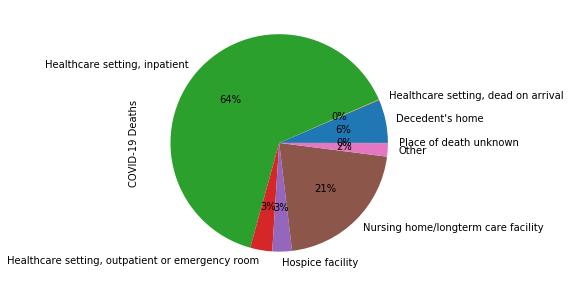

In [16]:
plot = df_us_placeofdeath.plot.pie(y='COVID-19 Deaths', figsize=(5, 5),legend=False,autopct='%1.0f%%')
#which place has the largest death number due to Covid-19

## In USA, which age group has largest death number by different diseases.

In [17]:
import numpy as np

In [18]:
import seaborn as sns

In [19]:
df_age_and_place= df[(df.State=='United States')&(df['Place of Death']!='All places of death')]

In [20]:
df_age_and_place=pd.pivot_table(df, index = ['Place of Death', 'Age group' ], values =['COVID-19 Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'],aggfunc = np.sum)

In [21]:
df_age_and_place.head(10)
#the dataset by different place of death and age group

COVID-19 Deaths  \
Place of Death                      Age group                            
All places of death                 All ages                 1378090.0   
Decedent's home                     0-14 years                     7.0   
                                    15-44 years                 2878.0   
                                    45-64 years                12981.0   
                                    65-74 years                11258.0   
                                    75-84 years                14089.0   
                                    85 years and over          17953.0   
                                    All ages                   59338.0   
Healthcare setting, dead on arrival 0-14 years                     2.0   
                                    15-44 years                   31.0   

                                                       Influenza Deaths  \
Place of Death                      Age group                             
All places of death                 All ages                    27187.0   
Decedent's home                     0-14 years                     20.0   
                                    15-44 years                   197.0   
                                    45-64 years                  1004.0   
                                    65-74 years                   608.0   
                                    75-84 years                   520.0   
                                    85 years and over             438.0   
                                    All ages                     3390.0   
Healthcare setting, dead on arrival 0-14 years                      2.0   
                                    15-44 years                     2.0   

                                                       Pneumonia Deaths  \
Place of Death                      Age group                             
All places of death                 All ages                  1209840.0   
Decedent's home                     0-14 years                     73.0   
                                    15-44 years                  1978.0   
                                    45-64 years                  8350.0   
                                    65-74 years                  9410.0   
                                    75-84 years                 13902.0   
                                    85 years and over           19375.0   
                                    All ages                    53316.0   
Healthcare setting, dead on arrival 0-14 years                      7.0   
                                    15-44 years                    13.0   

                                                       Pneumonia and COVID-19 Deaths  \
Place of Death                      Age group                                          
All places of death                 All ages                                658514.0   
Decedent's home                     0-14 years                                   0.0   
                                    15-44 years                                417.0   
                                    45-64 years                               2172.0   
                                    65-74 years                               2469.0   
                                    75-84 years                               3988.0   
                                    85 years and over                         5569.0   
                                    All ages                                 14994.0   
Healthcare setting, dead on arrival 0-14 years                                   2.0   
                                    15-44 years                                  4.0   

                                                       Pneumonia, Influenza, or COVID-19 Deaths  
Place of Death                      Age group                                                    
All places of death                 All ages                                          1953039.0  
Decedent's ho

In [22]:
df_age= df[(df.State=='United States')&(df['Place of Death']!='All places of death')&(df['Age group']!='All ages')]

In [23]:
df_age=df_age.groupby(['Age group']).sum()

In [24]:
df_age=df_age.reset_index()

In [25]:
df_age=df_age.drop(['HHS Region','Total Deaths'],axis=1)

In [26]:
df_age.head()

,Age group,COVID-19 Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,0-14 years,141.0,521.0,24.0,168.0,806.0
1,15-44 years,11231.0,10762.0,5082.0,693.0,17546.0
2,45-64 years,75050.0,69766.0,38598.0,2453.0,108315.0
3,65-74 years,98654.0,91337.0,51765.0,1926.0,139858.0
4,75-84 years,127841.0,113439.0,63794.0,1940.0,179166.0


Text(0.5, 1.0, 'Coivd19 death by Age group')

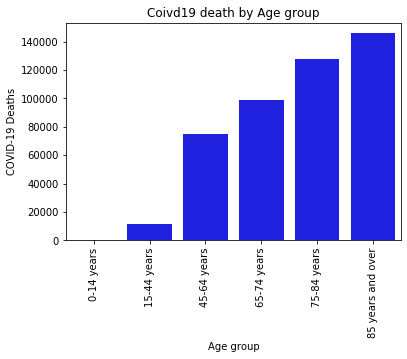

In [27]:
ax=sns.barplot(data=df_age, x='Age group',y='COVID-19 Deaths',color='b')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Coivd19 death by Age group')
#different age group have different death

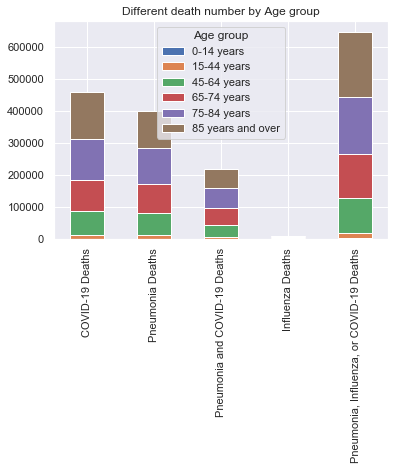

In [28]:
sns.set()
df_age.set_index('Age group').T.plot(kind='bar', stacked=True,title='Different death number by Age group')

## Which state has largest death due to Covid19.

In [29]:
df_state=df[(df.State!='United States')&(df['Age group']=='All ages')&(df['Place of Death']=='All places of death')&(df.State!='New York City')&(df.State!='Region total')]

In [30]:
df_state.sort_values(by=['State'],ascending=False)

,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
2516,8,Wyoming,All places of death,All ages,549.0,6031.0,543.0,244.0,11.0,859.0
1658,5,Wisconsin,All places of death,All ages,7161.0,68248.0,4876.0,2258.0,170.0,9945.0
858,3,West Virginia,All places of death,All ages,2078.0,25574.0,2509.0,981.0,68.0,3674.0
2974,10,Washington,All places of death,All ages,4293.0,68484.0,5641.0,2329.0,164.0,7763.0
801,3,Virginia,All places of death,All ages,7925.0,87210.0,6394.0,3068.0,156.0,11396.0
343,1,Vermont,All places of death,All ages,170.0,6707.0,324.0,44.0,18.0,468.0
2459,8,Utah,All places of death,All ages,1940.0,24370.0,1910.0,843.0,55.0,3062.0
1944,6,Texas,All places of death,All ages,41125.0,277655.0,36880.0,22363.0,604.0,56205.0
1315,4,Tennessee,All places of death,All ages,10208.0,97637.0,10868.0,5244.0,250.0,16072.0
2402,8,South Dakota,All places of death,All ages,1850.0,10855.0,1353.0,785.0,35.0,2450.0


In [31]:
df_largest_10=df_state.nlargest(10, 'COVID-19 Deaths')

In [32]:
df_largest_10.loc[0,'statecode'] = ''

In [33]:
df_largest_10.iloc[0,10] = 'CA'
df_largest_10.iloc[1,10] = 'TX'
df_largest_10.iloc[2,10] = 'FL'
df_largest_10.iloc[3,10] = 'PA'
df_largest_10.iloc[4,10] = 'NY'
df_largest_10.iloc[5,10] = 'NJ'
df_largest_10.iloc[6,10] = 'IL'
df_largest_10.iloc[7,10] = 'OH'
df_largest_10.iloc[8,10] = 'MI'
df_largest_10.iloc[9,10] = 'GA'

In [34]:
df_largest_10.head(10)

,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",statecode
2630,9.0,California,All places of death,All ages,46816.0,356798.0,46399.0,27045.0,842.0,66998.0,CA
1944,6.0,Texas,All places of death,All ages,41125.0,277655.0,36880.0,22363.0,604.0,56205.0,TX
972,4.0,Florida,All places of death,All ages,26712.0,269514.0,29949.0,15815.0,504.0,41312.0,FL
743,3.0,Pennsylvania,All places of death,All ages,22924.0,173864.0,16207.0,8975.0,344.0,30486.0,PA
457,2.0,New York,All places of death,All ages,20752.0,134811.0,17661.0,9193.0,290.0,29486.0,NY
400,2.0,New Jersey,All places of death,All ages,20238.0,105341.0,14781.0,9973.0,159.0,25190.0,NJ
1372,5.0,Illinois,All places of death,All ages,18940.0,141497.0,16240.0,9283.0,226.0,26117.0,IL
1600,5.0,Ohio,All places of death,All ages,18112.0,156364.0,14653.0,8210.0,327.0,24880.0,OH
1486,5.0,Michigan,All places of death,All ages,13544.0,124929.0,12500.0,6670.0,292.0,19653.0,MI
1029,4.0,Georgia,All places of death,All ages,13234.0,112524.0,11581.0,6781.0,208.0,18237.0,GA


In [35]:
df_map=df_largest_10.drop(['HHS Region','Place of Death','Age group','Total Deaths','Pneumonia Deaths','Pneumonia and COVID-19 Deaths','Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths'],axis=1)

Text(0.5, 1.0, 'Coivd19 death state')

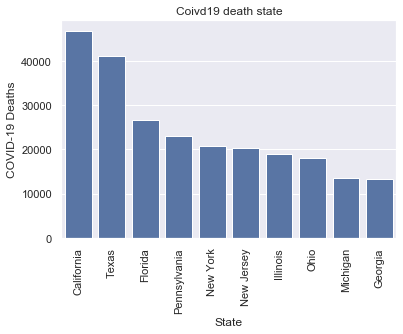

In [36]:
ax=sns.barplot(data=df_largest_10, x='State',y='COVID-19 Deaths',color='b')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Coivd19 death state')
#top 10 covid19 death state

In [39]:
import plotly.express as px

In [55]:
import plotly.graph_objects as go


In [61]:
conda install -c plotly plotly-orca

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - plotly-orca


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py37hecd8cb5_0         2.9 MB
    plotly-orca-1.3.1          |                1        56.8 MB  plotly
    ------------------------------------------------------------
                                           Total:        59.7 MB

The following NEW packages will be INSTALLED:

  plotly-orca        plotly/osx-64::plotly-orca-1.3.1-1

The following packages will be UPDATED:

  conda                                        4.8.4-py37_0 --> 4.9.2-py37hecd8cb5_0



conda-4.9.2          | 2.9 MB    | ##################################### | 100% 
plotly-orca-1.3.1    | 56.8 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: - WARNING

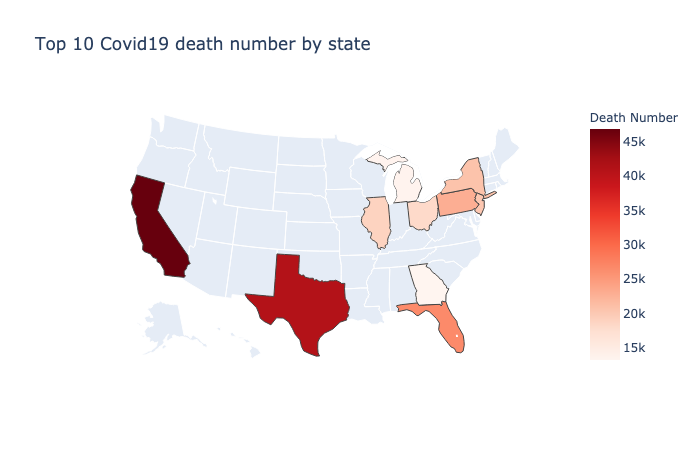

In [62]:
fig =go.Figure(data=go.Choropleth(
    locations=df_largest_10['statecode'], 
    z = df_largest_10['COVID-19 Deaths'].astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Death Number",
))
fig.update_layout(
    title_text = 'Top 10 Covid19 death number by state',
    geo_scope='usa',
)
fig.show()